# Importing libraries and data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ml-25m/ratings.csv")

In [3]:
data.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


# Pivoting data

In [5]:
df = data.pivot(index="userId", columns="movieId", values="rating")

/Users/rishisoni/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/reshape.py:134: PerformanceWarning: The following operation may generate 9597558427 cells in the resulting pandas object.
  warnings.warn(


In [6]:
df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,209145,209147,209151,209153,209155,209157,209159,209163,209169,209171
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizing Users vs Movies Rated

In [7]:
totalMovies = df.shape[1]

In [8]:
totalMovies

59047

In [9]:
moviesSeen = totalMovies - df.isna().sum(axis=1)
moviesSeen.describe()

count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
25%          36.000000
50%          71.000000
75%         162.000000
max       32202.000000
dtype: float64

Text(0.5, 1.0, 'Users vs Movies Rated')

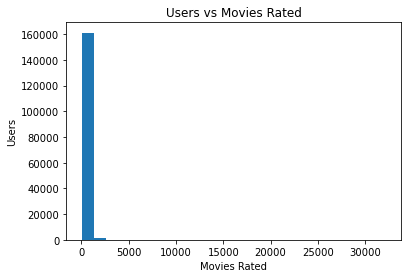

In [10]:
plt.hist(moviesSeen, bins=25)
plt.xlabel("Movies Rated")
plt.ylabel("Users")
plt.title("Users vs Movies Rated")

### Getting a better look, excluding outliers

Text(0.5, 1.0, 'Users vs Movies Rated')

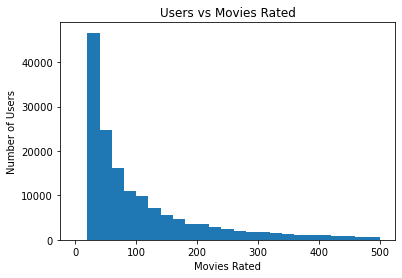

In [11]:
plt.hist(moviesSeen, bins=25, range=(0, 500))
plt.xlabel("Movies Rated")
plt.ylabel("Number of Users")
plt.title("Users vs Movies Rated")

### Data is certainly right-skewed. We can consider removing users who don't have enough ratings. I won't remove any for now.

# Visualizing ratings per movie

In [12]:
numUsers = df.shape[0]

In [13]:
numUsers

162541

In [14]:
ratingsPerMovie = numUsers - df.isna().sum(axis=0)

In [15]:
ratingsPerMovie.describe()

count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      81491.000000
dtype: float64

Text(0, 0.5, 'Ratings')

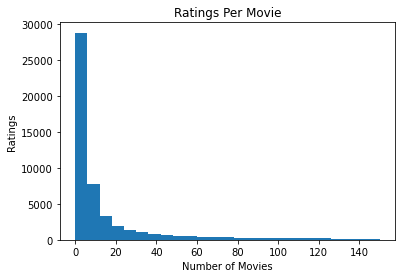

In [16]:
plt.hist(ratingsPerMovie, bins=25, range=(0, 150))
plt.title("Ratings Per Movie")
plt.xlabel("Number of Movies")
plt.ylabel("Ratings")

# Cleaning Data

### 60,000 movies is way too many. I will be removing any movies that have less than 100 ratings, which leaves us with 10,326 movies. Later, we may need to remove movies with too many ratings.

In [17]:
keptMovies = ratingsPerMovie[ratingsPerMovie >= 100].index

In [18]:
cleanedDF = df.loc[:, keptMovies]

In [19]:
cleanedDF.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,202103,202393,202429,202439,203222,203519,204352,204542,204698,205383
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exporting dataframe in pickle format instead of CSV since it is much more efficient.

In [20]:
cleanedDF.to_pickle("cleaned_data.pkl")

In [3]:
demo = pd.read_pickle("cleaned_data.pkl")
#Pickle can be read the same way as CSV

In [4]:
demo.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,202103,202393,202429,202439,203222,203519,204352,204542,204698,205383
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
